## Problem Statement
You are provided with a dataset containing various attributes of different wine samples. The goal of this assignment is to perform cluster analysis using the K-means algorithm to identify natural groupings in the data based on the attributes provided.

## Dataset Overview
The dataset consists of the following columns:
1. **Alcohol**: Alcohol content in the wine sample.
2. **Malic_Acid**: Amount of malic acid in the wine.
3. **Ash**: Ash content in the wine.
4. **Ash_Alcalinity**: Alkalinity of ash in the wine.
5. **Magnesium**: Magnesium content in the wine.
6. **Total_Phenols**: Total phenols content in the wine.
7. **Flavanoids**: Flavonoid content in the wine.
8. **Nonflavanoid_Phenols**: Non-flavonoid phenol content in the wine.
9. **Proanthocyanins**: Proanthocyanin content in the wine.
10. **Color_Intensity**: Intensity of the color of the wine.
11. **Hue**: Hue of the wine.
12. **OD280**: Ratio of OD280/OD315 of diluted wines.
13. **Proline**: Proline content in the wine.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings as wr
wr.filterwarnings('ignore')

In [2]:
df = pd.read_csv('WineData.csv')
df.head()

,Unnamed: 0,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Tasks

### Task 1: Data Preprocessing
- Handle any missing values if present.
- Scale the data using `StandardScaler` or `MinMaxScaler` since K-means is sensitive to the scale of features.
- Remove any unnecessary columns that don't contribute to clustering (e.g., index column if not relevant).

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler()

In [7]:
df_scaled = scaler.fit_transform(df)

In [8]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [9]:
df_scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [10]:
df_scaled.shape

(178, 13)

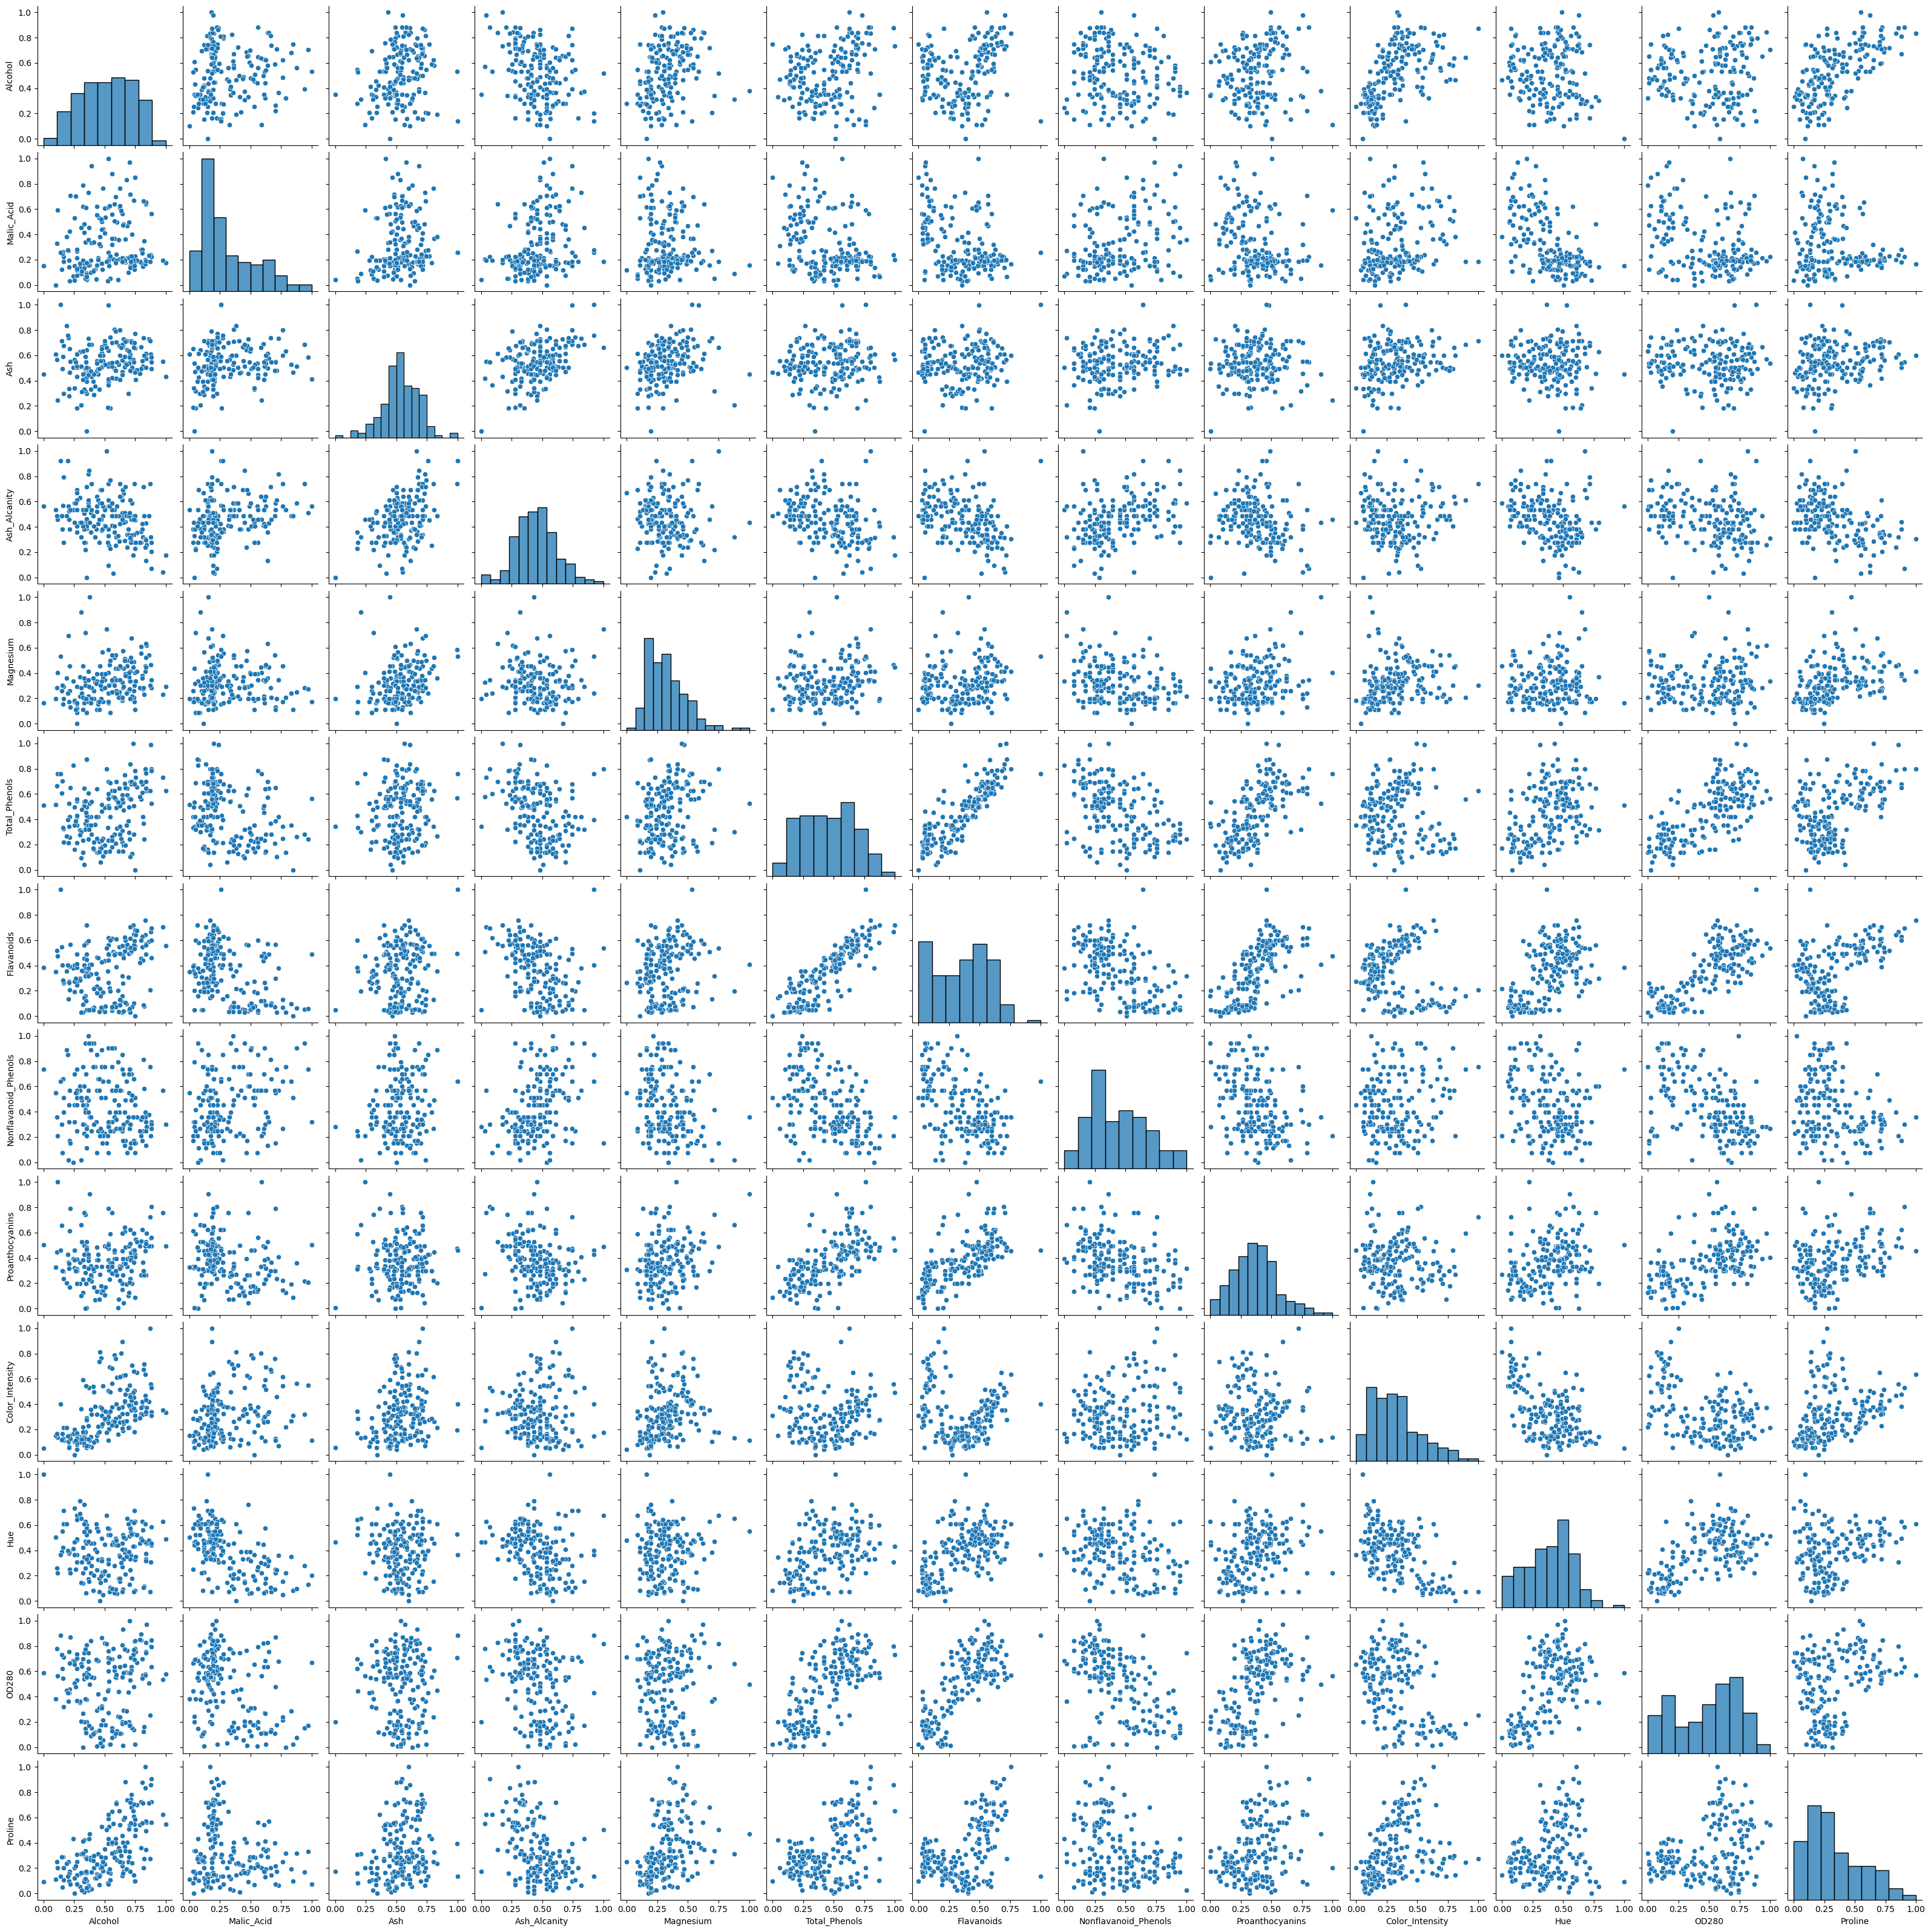

In [11]:
import seaborn as sns
sns.pairplot(df_scaled)
plt.savefig('image.png')

### Task 2: Determine the Optimal Number of Clusters
- Use the **Elbow method** to determine the optimal number of clusters.
- Visualize the results using a line plot of the **Within-Cluster Sum of Squares (WCSS)** against the number of clusters.



In [12]:
from sklearn.cluster import KMeans

In [13]:
wcss=[]
cluster=range(1,15)

for k in cluster:
    clst=KMeans(n_clusters=k)
    clst.fit(df_scaled)
    wcss.append(clst.inertia_)

In [14]:
wcss

[95.5995377847106,
 64.53766702389431,
 48.98541496004463,
 45.200120986960926,
 42.594942189201355,
 40.73368167632452,
 38.317145542992925,
 36.92045531943116,
 35.96943085891274,
 34.153439308270045,
 32.951004218506064,
 31.90708137311243,
 31.02963156702134,
 30.41868429211537]

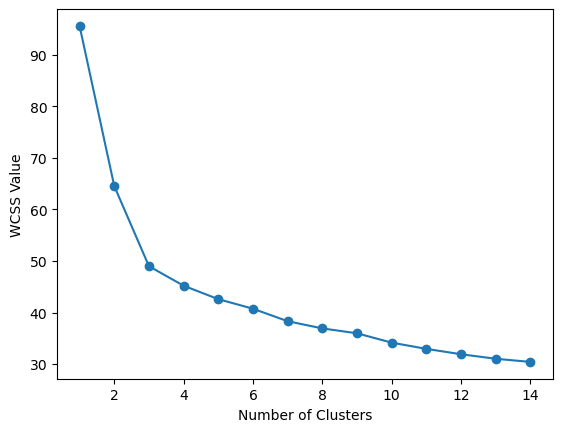

In [15]:
plt.plot(range(1,15),wcss,marker='o')
plt.ylabel('WCSS Value')
plt.xlabel('Number of Clusters')
plt.show()

In [16]:
from kneed import KneeLocator as kn

In [17]:
kl=kn(cluster,wcss,direction='decreasing',curve='convex')

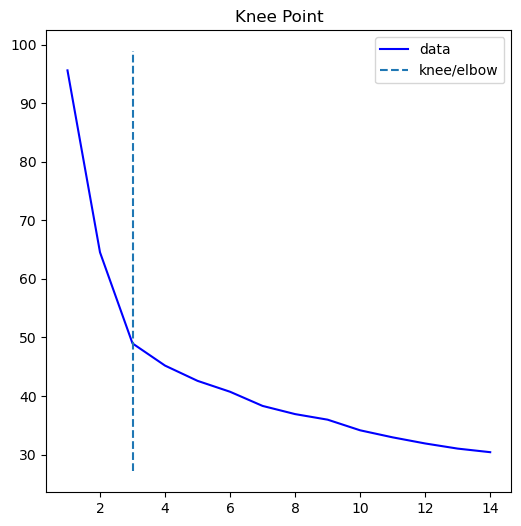

In [18]:
kl.plot_knee()

In [19]:
kl.knee

3

### Task 3: K-means Clustering
- Apply K-means clustering using the optimal number of clusters obtained from the Elbow method.
- Assign cluster labels to each data point and create a new column in the dataset with these labels.



In [20]:
km=KMeans(n_clusters=kl.knee)

In [21]:
df_scaled['defClusters']=km.fit_predict(df_scaled)

In [22]:
df_scaled.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,defClusters
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341,1
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642,1
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933,1
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347,1
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963,1


In [23]:
df_scaled.tail()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,defClusters
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529,2
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662,2
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290,2
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856,2
177,0.815789,0.664032,0.737968,0.716495,0.282609,0.368966,0.088608,0.811321,0.296530,0.675768,0.105691,0.120879,0.201141,2


In [24]:
cen= km.cluster_centers_

In [25]:
cen

array([[0.31336675, 0.23561704, 0.47304983, 0.50024546, 0.24551415,
        0.44805692, 0.38008171, 0.41868823, 0.39717591, 0.14778699,
        0.47218996, 0.58422001, 0.15637525],
       [0.70565142, 0.24842869, 0.58490401, 0.3444313 , 0.41072701,
        0.64211419, 0.55467939, 0.30034024, 0.47727155, 0.35534046,
        0.47780888, 0.69038612, 0.59389397],
       [0.54668616, 0.48440931, 0.56159636, 0.53865979, 0.31521739,
        0.2467433 , 0.10474293, 0.61425577, 0.22543521, 0.48878144,
        0.18888889, 0.15852666, 0.24911502]])

In [26]:
df0=df_scaled[df_scaled.defClusters==0]
df1=df_scaled[df_scaled.defClusters==1]
df2=df_scaled[df_scaled.defClusters==2]

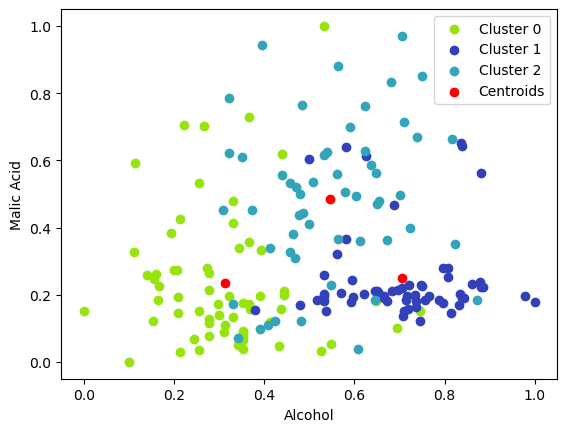

In [27]:
plt.scatter(df0.Alcohol,df0.Malic_Acid, color='#97e40d', label='Cluster 0')
plt.scatter(df1.Alcohol,df1.Malic_Acid, color='#3241b9', label='Cluster 1')
plt.scatter(df2.Alcohol,df2.Malic_Acid, color='#32a5b9', label='Cluster 2')
plt.scatter(cen[:,0],cen[:,1],color='red',label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Malic Acid')
plt.legend()
plt.show()

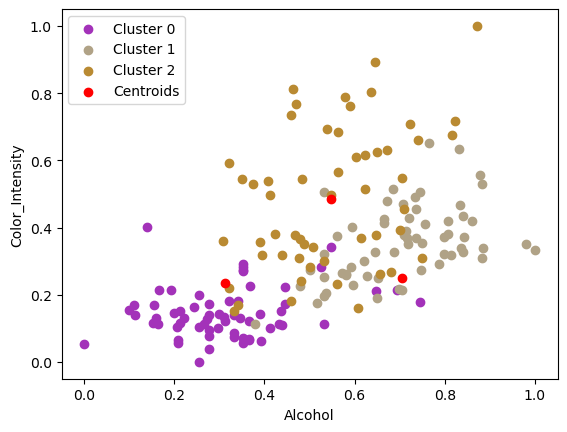

In [28]:
plt.scatter(df0.Alcohol,df0.Color_Intensity, color='#a332b9', label='Cluster 0')
plt.scatter(df1.Alcohol,df1.Color_Intensity, color='#b0a286', label='Cluster 1')
plt.scatter(df2.Alcohol,df2.Color_Intensity, color='#b98a32', label='Cluster 2')
plt.scatter(cen[:,0],cen[:,1],color='red',label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Color_Intensity')
plt.legend()
plt.show()

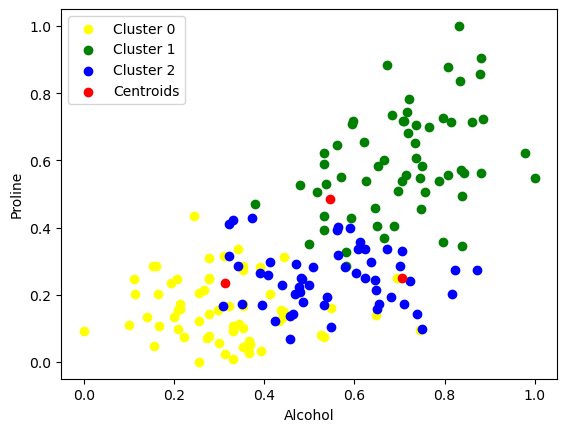

In [29]:
plt.scatter(df0.Alcohol,df0.Proline,color='yellow', label='Cluster 0')
plt.scatter(df1.Alcohol,df1.Proline,color='green', label='Cluster 1')
plt.scatter(df2.Alcohol,df2.Proline,color='blue', label='Cluster 2')
plt.scatter(cen[:,0],cen[:,1],color='red',label='Centroids')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.legend()
plt.show()

### Task 4: Cluster Analysis
- Analyze the clusters by comparing the mean values of each feature within each cluster.
- Visualize the clusters using a pairplot or scatterplot for selected features to understand the separations visually.



In [30]:
cluster_means=df_scaled.groupby('defClusters').mean()

In [31]:
cluster_means

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
defClusters,,,,,,,,,,,,,
0,0.313367,0.235617,0.473050,0.500245,0.245514,0.448057,0.380082,0.418688,0.397176,0.147787,0.472190,0.584220,0.156375
1,0.705651,0.248429,0.584904,0.344431,0.410727,0.642114,0.554679,0.300340,0.477272,0.355340,0.477809,0.690386,0.593894
2,0.546686,0.484409,0.561596,0.538660,0.315217,0.246743,0.104743,0.614256,0.225435,0.488781,0.188889,0.158527,0.249115


In [32]:
selected_features=['Alcohol','Malic_Acid','Flavanoids','Color_Intensity','Proline','defClusters']

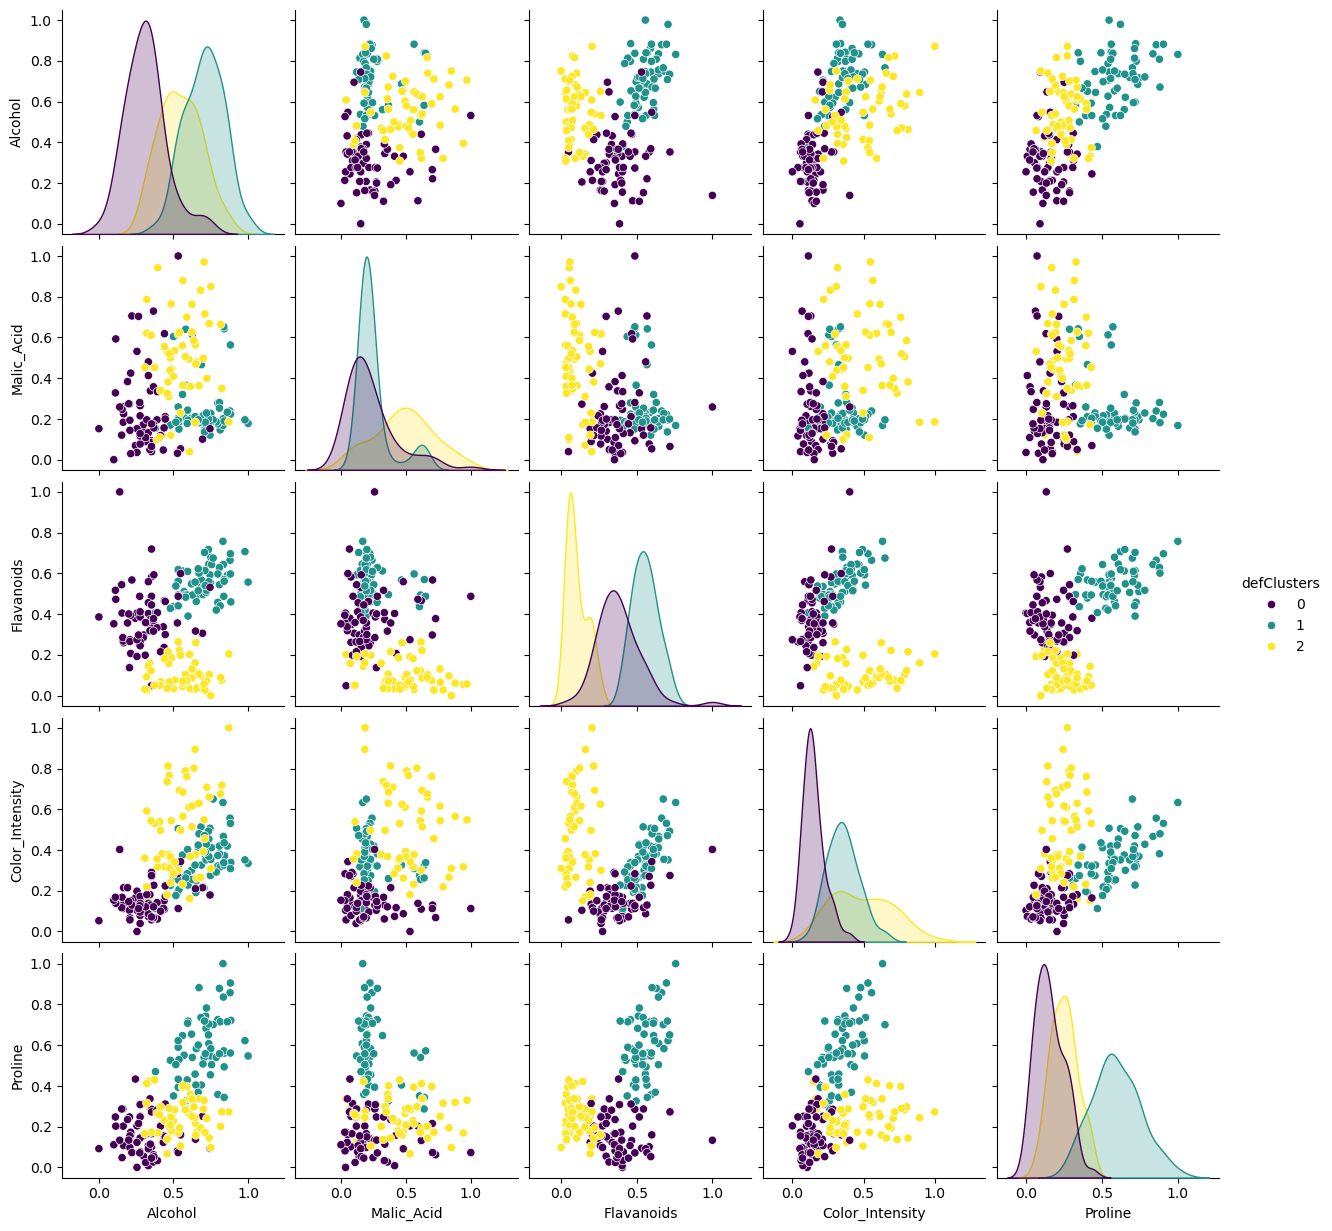

In [33]:
sns.pairplot(df_scaled[selected_features],hue='defClusters',palette='viridis')
plt.show()

### Task 5: Interpretation
- Interpret the characteristics of each cluster. For example, identify which cluster has the highest alcohol content, or which has the most intense color, etc.
- Suggest potential names or categories for each cluster based on the observed characteristics.


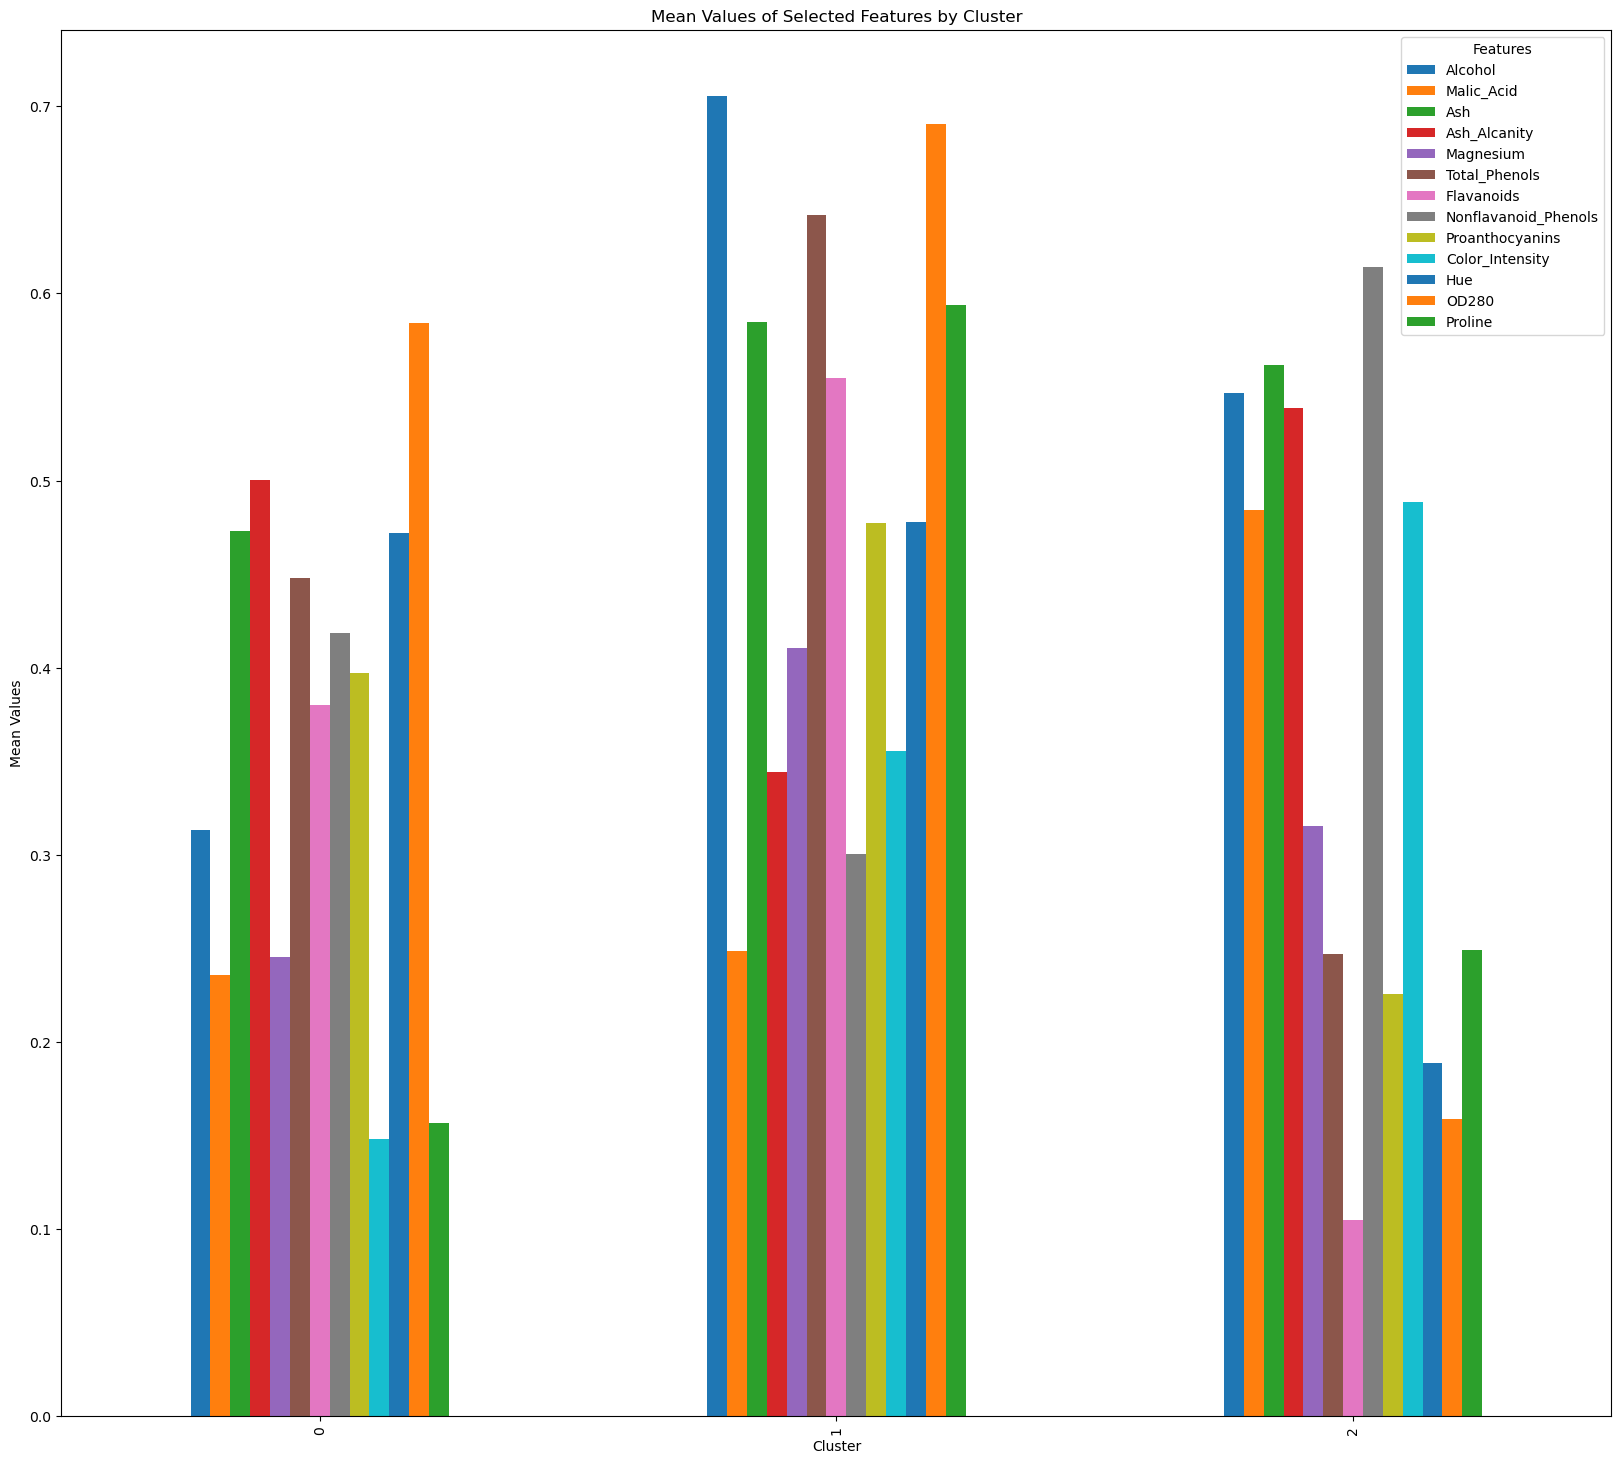

In [34]:
cluster_means.plot(kind='bar', figsize=(20, 18))
plt.title('Mean Values of Selected Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Values')
plt.legend(title='Features')
plt.show()

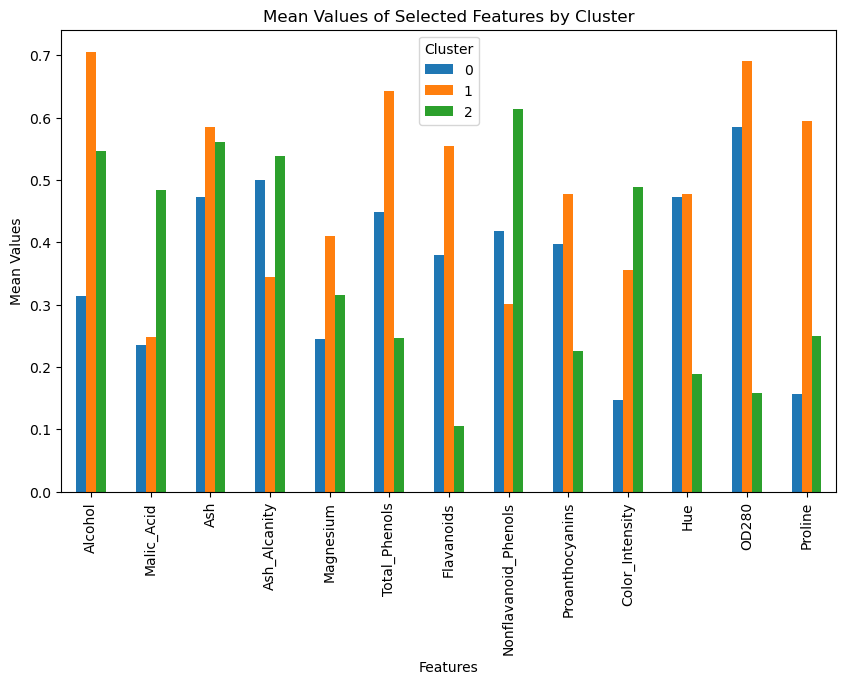

In [35]:
cluster_means_transposed = cluster_means.T
cluster_means_transposed.plot(kind='bar', figsize=(10, 6))
plt.title('Mean Values of Selected Features by Cluster')
plt.xlabel('Features')
plt.ylabel('Mean Values')
plt.legend(title='Cluster')
plt.show()